# input にあるpngを正規化したものに変換する

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm


In [2]:
from normalize import normalize_xray

shape (1024, 1024)
max 255
min 0


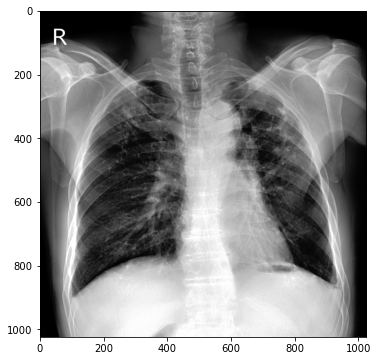

In [3]:
# test normalize hist
path = "../../input/vinbigdata-chest-xray-resized-png-1024x1024/test/ffccf1709d0081d122a1d1f9edbefdf1.png"
img = cv2.imread(path,0)
norm_img = normalize_xray(img, "hist")
print("shape",norm_img.shape)
print("max",norm_img.max())
print("min",norm_img.min())
plt.figure(figsize = (6,6))
plt.imshow(norm_img, 'gray')

shape (1024, 1024)
max 255
min 2


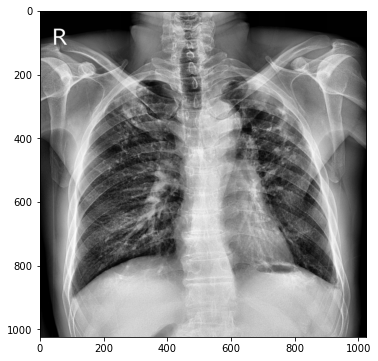

In [5]:
# test normalize hist
path = "../../input/vinbigdata-chest-xray-resized-png-1024x1024/test/ffccf1709d0081d122a1d1f9edbefdf1.png"
img = cv2.imread(path,0)
norm_img = normalize_xray(img, "clahe")
print("shape",norm_img.shape)
print("max",norm_img.max())
print("min",norm_img.min())
plt.figure(figsize = (6,6))
plt.imshow(norm_img, 'gray')


In [6]:
def normalize_xray_from_dir(original_img_dir, way="hist"):
    new_img_dir = original_img_dir + "_" + way
    original_train_dir = os.path.join(original_img_dir, "train")
    original_test_dir = os.path.join(original_img_dir, "test")
    new_train_dir = os.path.join(new_img_dir, "train")
    new_test_dir = os.path.join(new_img_dir, "test")
    print(f"normalizing from {original_img_dir} to {new_img_dir} ...")
    
    # 保存先を作成
    os.makedirs(new_train_dir, exist_ok=True)
    os.makedirs(new_test_dir, exist_ok=True)
    
    print("normalizing train ...")
    train_png_name_list = os.listdir(original_train_dir)
    for train_png_name in tqdm(train_png_name_list):
        original_path = os.path.join(original_train_dir, train_png_name)
        new_path = os.path.join(new_train_dir, train_png_name)
        
        img = cv2.imread(original_path,0)
        norm_img = normalize_xray(img, way)
        cv2.imwrite(new_path,norm_img)

    print("normalizing test ...")
    test_png_name_list = os.listdir(original_test_dir)
    for test_png_name in tqdm(test_png_name_list):
        original_path = os.path.join(original_test_dir, test_png_name)
        new_path = os.path.join(new_test_dir, test_png_name)
        
        img = cv2.imread(original_path,0)
        norm_img = normalize_xray(img, way)
        cv2.imwrite(new_path,norm_img)

In [7]:
original_img_512_dir = "../../input/vinbigdata-chest-xray-resized-png-512x512"
original_img_1024_dir = "../../input/vinbigdata-chest-xray-resized-png-1024x1024"

normalizing from ../../input/vinbigdata-chest-xray-resized-png-512x512 to ../../input/vinbigdata-chest-xray-resized-png-512x512_hist ...
normalizing train ...



normalizing test ...


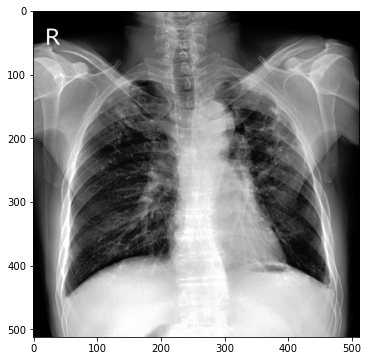

In [8]:
normalize_xray_from_dir(original_img_512_dir, way="hist")

# test normalize hist
path = "../../input/vinbigdata-chest-xray-resized-png-512x512_hist/test/ffccf1709d0081d122a1d1f9edbefdf1.png"
img = cv2.imread(path,0)
plt.figure(figsize = (6,6))
plt.imshow(img, 'gray')

normalizing from ../../input/vinbigdata-chest-xray-resized-png-512x512 to ../../input/vinbigdata-chest-xray-resized-png-512x512_clahe ...
normalizing train ...



normalizing test ...


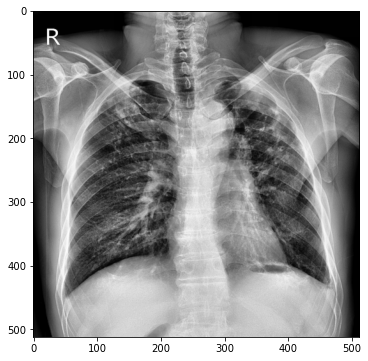

In [9]:
normalize_xray_from_dir(original_img_512_dir, way="clahe")

# test normalize hist
path = "../../input/vinbigdata-chest-xray-resized-png-512x512_clahe/test/ffccf1709d0081d122a1d1f9edbefdf1.png"
img = cv2.imread(path,0)
plt.figure(figsize = (6,6))
plt.imshow(img, 'gray')